# Getting the polygon that contain an arbitrary point

In this notebook we will generate an arbitrary point in a 2D space, we will generate a neighborhood of a quasiperiodic lattice (of arbitrary symmetry) around that point and we will get the polygon that contains that point.

To know which polygon contain the point of our interest, we will use an algorithm that generate a semi-line with origin in our point of interest and with an arbitrary direction. We will ask for each of the polygons in the neighborhood if that semiline intersect it, if not, then that polygons doesn't contain our point, if yes we have two options:

If the semiline intersect two sides of the polygon, then that polygon doesn't contain our point.

If the semiline intersect one side of the polygon, then that polygons is the one that contain the point.

First, let's load the Julia files with the functions that we will use in this notebook

In [1]:
include("Operaciones_Basicas.jl")
include("Red_Dual.jl")
include("Separacion_Arreglos_X_Y.jl")
include("Generador_Vecindades_Pto_Arbitrario.jl")
include("Dentro_Fuera_Poligono.jl")

encontrar_Poligono (generic function with 1 method)

We will use the "Plots" package to visualize our polygons, so let's load that

In [2]:
using Plots

### Obtain the vertices polygons of the quasiperiodic lattice in the neighborhood around an arbitrary point

Create the information of the star vectors required by the GDM algorithm, which determine the symmetry of the quasiperiodic lattice. Also, generate the array that contains the alpha constants and the array with the average distance between stripes.

In [3]:
NSides = 5; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

In [4]:
Point = Float64[]; #An Float64 array that will held the coordinates of the arbitrary point

SL = 1e10; #Size of a half side of the square

#Generate two random numbers that will determine in which cuadrant will be the arbitrary point
x = rand();
y = rand();

if (x > 0.5) && (y > 0.5)
    Point = [rand()*SL, rand()*SL];
elseif (x > 0.5) && (y < 0.5)
    Point = [rand()*SL, -rand()*SL];
elseif (x < 0.5) && (y > 0.5)
    Point = [-rand()*SL, rand()*SL];
elseif (x < 0.5) && (y < 0.5)
    Point = [-rand()*SL, -rand()*SL];
end

Projections = proyecciones_Pto_Direccion_Franjas(Point, Average_Distance_Stripes, Star_Vectors);

N = 1; #The margin of error to consider

#Let's get the vertices of the polygons in our neighborhood and the information of how them were generated
Dual_Points = generador_Vecindades_Vertices(Projections, Star_Vectors, Alphas_Array, N);

#Let's split the vertices coordinates in X coordinates and Y coordinates
X, Y = separacion_Arreglo_de_Arreglos_2D(Dual_Points);

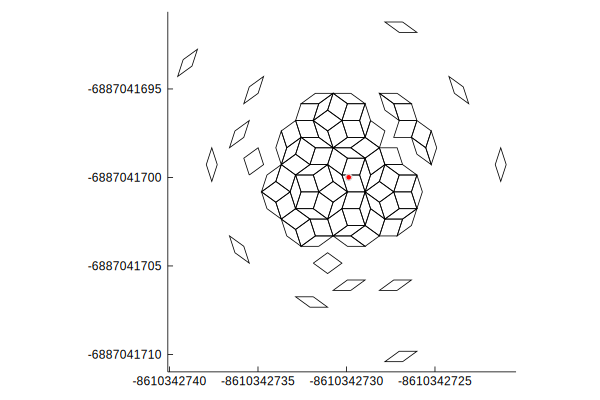

In [5]:
#Let's visualize the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
scatter!([Point[1]], [Point[2]], legend = false, color = "red")

To use the algorithm describe above with the semiline and the polygons, we must use a special type of variable named "segmento" (defined in the file "Dentro_Fuera_Poligono.jl")

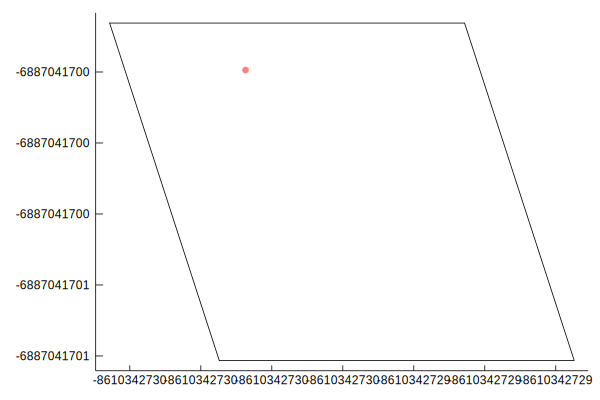

GKS: Possible loss of precision in routine SET_WINDOW


In [6]:
Polygons = obtener_Segmentos_Vertices(X, Y); #Obtain the polygons defined as segments, four for each polygon

#Now let's get the information of how the container polygons was generated
Vertices_Container_Polygon = encontrar_Poligono(Point, Polygons);

#Let's visualize the container polygon
plot()    
plot([Vertices_Container_Polygon[1][1], Vertices_Container_Polygon[2][1], Vertices_Container_Polygon[3][1], Vertices_Container_Polygon[4][1], Vertices_Container_Polygon[1][1]], [Vertices_Container_Polygon[1][2], Vertices_Container_Polygon[2][2], Vertices_Container_Polygon[3][2], Vertices_Container_Polygon[4][2], Vertices_Container_Polygon[1][2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
scatter!([Point[1]], [Point[2]], markersize = 5, markeralpha = 0.5, markerstrokewidth = 0, markercolor = :red)

#### Example in a higher symmetry

In [7]:
NSides = 80; #Symmetry of the quasiperiodic lattice

Star_Vectors = [[BigFloat(1),0]]; #Array wich will contain the Star Vectors

for i in 1:(NSides-1)
    push!(Star_Vectors, [cos((2*i)*pi/NSides), sin((2*i)*pi/NSides)]); #Complete the Star_Vector Array
end

Alphas_Array = fill(0.2, NSides); #Array of the alphas constant

Average_Distance_Stripes = fill(NSides/2, NSides); #Array with the average distance between stripes

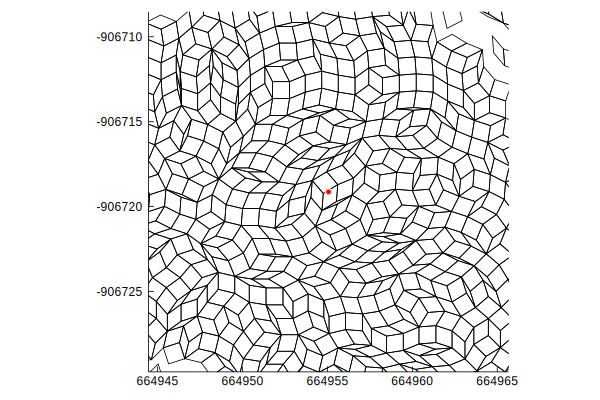

In [8]:
Point = Float64[]; #An Float64 array that will held the coordinates of the arbitrary point

SL = 1e6; #Size of a half side of the square

#Generate two random numbers that will determine in which cuadrant will be the arbitrary point
x = rand();
y = rand();

if (x > 0.5) && (y > 0.5)
    Point = [rand()*SL, rand()*SL];
elseif (x > 0.5) && (y < 0.5)
    Point = [rand()*SL, -rand()*SL];
elseif (x < 0.5) && (y > 0.5)
    Point = [-rand()*SL, rand()*SL];
elseif (x < 0.5) && (y < 0.5)
    Point = [-rand()*SL, -rand()*SL];
end

Projections = proyecciones_Pto_Direccion_Franjas(Point, Average_Distance_Stripes, Star_Vectors);

#NOTE THAT FOR HIGHER SYMMETRY WE DON'T NEED TO USE A MARGIN OF ERROR
N = 0; #The margin of error to consider

#Let's get the vertices of the polygons in our neighborhood and the information of how them were generated
Dual_Points = generador_Vecindades_Vertices(Projections, Star_Vectors, Alphas_Array, N);

#Let's split the vertices coordinates in X coordinates and Y coordinates
X, Y = separacion_Arreglo_de_Arreglos_2D(Dual_Points);

#Let's visualize the quasiperiodic lattice
plot()
for i in 1:4:length(X)
    plot!([X[i],X[i+1],X[i+2],X[i+3],X[i]],[Y[i],Y[i+1],Y[i+2],Y[i+3],Y[i]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
end
scatter!([Point[1]], [Point[2]], legend = false, color = "red", xlimit = [Point[1]-10, Point[1]+10], ylimit = [Point[2]-10, Point[2]+10])

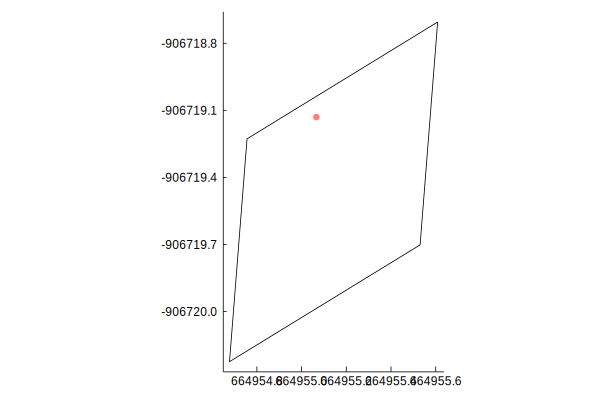

In [9]:
Polygons = obtener_Segmentos_Vertices(X, Y); #Obtain the polygons defined as segments, four for each polygon

#Now let's get the information of how the container polygons was generated
Vertices_Container_Polygon = encontrar_Poligono(Point, Polygons);

#Let's visualize the container polygon
plot()    
plot([Vertices_Container_Polygon[1][1], Vertices_Container_Polygon[2][1], Vertices_Container_Polygon[3][1], Vertices_Container_Polygon[4][1], Vertices_Container_Polygon[1][1]], [Vertices_Container_Polygon[1][2], Vertices_Container_Polygon[2][2], Vertices_Container_Polygon[3][2], Vertices_Container_Polygon[4][2], Vertices_Container_Polygon[1][2]], markersize = 0.2, key = false, aspect_ratio=:equal, grid = false, color =:black)
scatter!([Point[1]], [Point[2]], markersize = 5, markeralpha = 0.5, markerstrokewidth = 0, markercolor = :red)